In [1]:
import sys
sys.path.append('..')
import re

In [6]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils.load_data import load_dataset
import shap
import seaborn as sns
root_path="C://Users//noemi//Desktop//university//university//tesi/Thesis-XAI/"

In [3]:
with open(root_path+"y_test_ascending_idx.pkl", 'rb') as f:
    y_test_ascending = pickle.load(f)

### INDEXES for separate shap values

To separate SHAP values we need to know where the label changes. so we create a list of 11 elements each of one it include the indexes of that specific matrix where the label is changing

In [49]:
indexes=[]
for patient in range(11):
    index=[0]
    for i in range(len(y_test_ascending[patient])-1):
        if y_test_ascending[patient][i]!=y_test_ascending[patient][i+1]:
            index.append(i+1)
    index.append(len(y_test_ascending[patient])) 
    indexes.append(index)

## XRT

In [11]:
file_path = root_path+ "resources/SHAP/SHAP_EXTRA/shap_XRT_all_bk_ascending_indexed.pkl"
with open(file_path, 'rb') as f:
    shap_values_XRT_ordered = pickle.load(f)


3297

In [34]:
print(shap_values_XRT_ordered[0][5][y_test_ascending[0]==6])



              MAV1      MAV2      MAV3      MAV4      MAV5      MAV6  \
725  -9.704615e-03  0.002926  0.000159  0.003830  0.003323 -0.001945   
726  -1.313131e-04 -0.012649 -0.013437  0.000685  0.002767 -0.012471   
727  -3.934059e-03 -0.004209  0.001340 -0.005574 -0.004360  0.002320   
728   5.005051e-04  0.001646 -0.006632  0.002977  0.003076 -0.008459   
729  -2.935960e-07 -0.012355 -0.007892 -0.000148  0.001747 -0.012975   
...            ...       ...       ...       ...       ...       ...   
3040  1.465952e-03  0.002538 -0.004284  0.006526  0.004028 -0.004131   
3041 -4.798774e-04 -0.002214 -0.007014 -0.001887  0.001268 -0.009136   
3042  1.219912e-02  0.013679  0.016010  0.008696  0.006512  0.020611   
3043  1.044379e-02  0.018757  0.018173  0.015628  0.010363  0.029726   
3044 -4.104365e-03  0.002182  0.000457  0.004170  0.000772 -0.003133   

          MAV7      MAV8      MAV9     MAV10  ...     IEMG1     IEMG2  \
725   0.011660 -0.004833 -0.006077 -0.017589  ... -0.005914 -0

## SHAP VALUES

for each patient, **8 different shap value matrices** have been computed (separately for each class), but for each class have been considered both the element of the same class and element from a different class.


In order to limit the dimension of the pltos, for each class have been selected *only* instances of that specific class, divided by round (in each round it is supposed to be 2 movements but we don't know when to separate)
then, the abs value is computed and all values are normalized for the maximum.


we obtain 8 plots of 2 different round with the importance of each feature over time


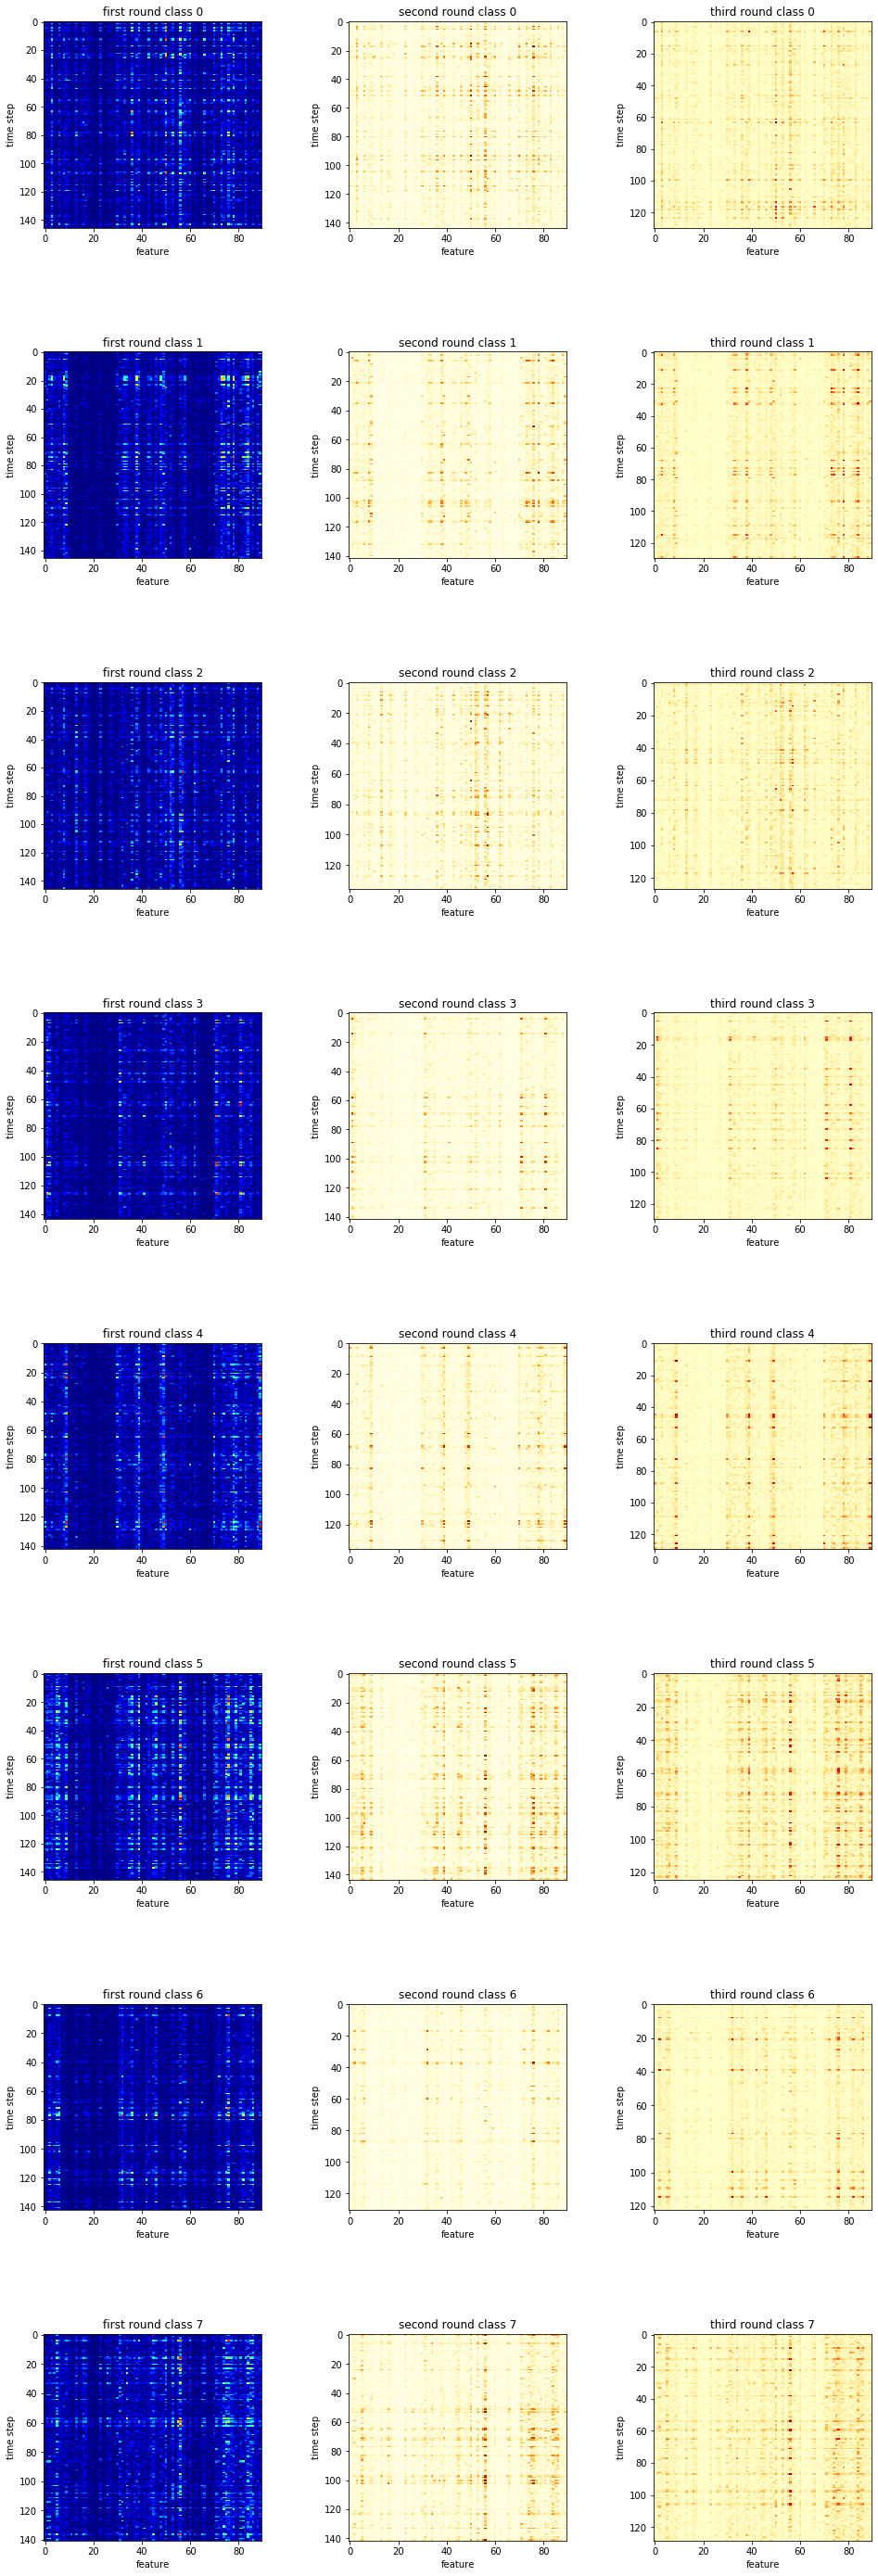

In [80]:
patient=0
heigth=8;
width=3;
f, axes = plt.subplots(heigth, width,figsize=(16, 50))
f.subplots_adjust(hspace=0.6, wspace=0.4)
for i in range(8):
    
    value=(shap_values_XRT_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs())
    maximum=(value.max()).max()
    axes[i,0].imshow(value/maximum, cmap='jet', aspect='auto', alpha=1)
    axes[i,0].set(xlabel='feature', ylabel='time step')
    axes[i,0].set(title="first round class {}".format(i))
    
    value=(shap_values_XRT_ordered[patient][i][indexes[patient][i+8]:indexes[patient][i+8+1]].abs())
    maximum=(value.max()).max()
    axes[i,1].imshow(value/maximum, cmap='YlOrBr', aspect='auto', alpha=1)
    axes[i,1].set(xlabel='feature', ylabel='time step')
    axes[i,1].set(title="second round class {}".format(i))
    
    value=(shap_values_XRT_ordered[patient][i][indexes[patient][i+16]:indexes[patient][i+16+1]].abs())
    maximum=(value.max()).max()
    axes[i,2].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
    axes[i,2].set(xlabel='feature', ylabel='time step')
    axes[i,2].set(title="third round class {}".format(i))
    


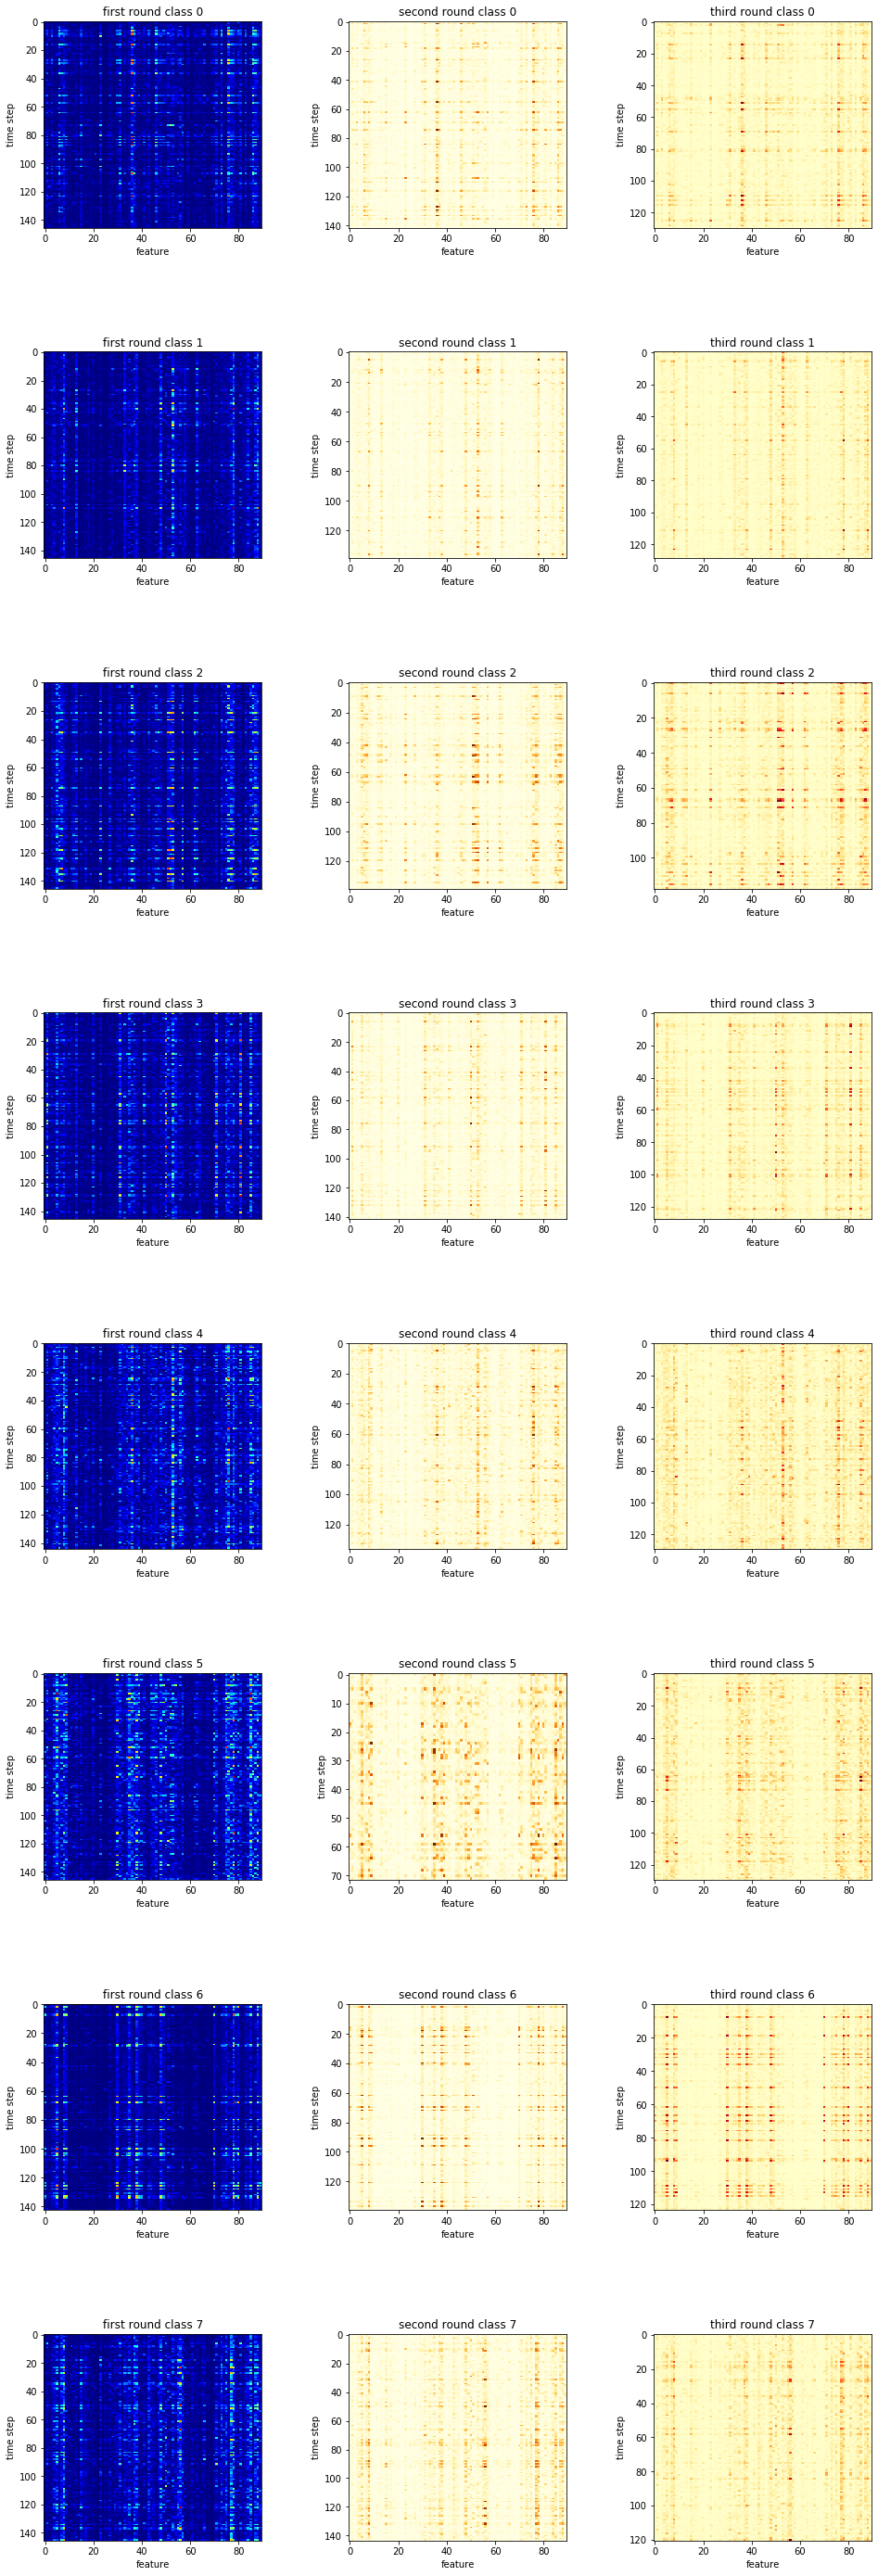

In [79]:
patient=1
heigth=8;
width=3;
f, axes = plt.subplots(heigth, width,figsize=(16, 50))
f.subplots_adjust(hspace=0.6, wspace=0.4)
for i in range(8):
    
    value=(shap_values_XRT_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs())
    maximum=(value.max()).max()
    axes[i,0].imshow(value/maximum, cmap='jet', aspect='auto', alpha=1)
    axes[i,0].set(xlabel='feature', ylabel='time step')
    axes[i,0].set(title="first round class {}".format(i))
    
    value=(shap_values_XRT_ordered[patient][i][indexes[patient][i+8]:indexes[patient][i+8+1]].abs())
    maximum=(value.max()).max()
    axes[i,1].imshow(value/maximum, cmap='YlOrBr', aspect='auto', alpha=1)
    axes[i,1].set(xlabel='feature', ylabel='time step')
    axes[i,1].set(title="second round class {}".format(i))
    
    value=(shap_values_XRT_ordered[patient][i][indexes[patient][i+16]:indexes[patient][i+16+1]].abs())
    maximum=(value.max()).max()
    axes[i,2].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
    axes[i,2].set(xlabel='feature', ylabel='time step')
    axes[i,2].set(title="third round class {}".format(i))

## LDA

In [81]:
file_path = root_path+ "resources/SHAP/SHAP_LDA/shap_LDA_all_ascending_indexed.pkl"
with open(file_path, 'rb') as f:
    shap_values_LDA_ordered = pickle.load(f)


In [84]:
print(len(shap_values_LDA_ordered))
print(len(shap_values_LDA_ordered[0]))
print(shap_values_LDA_ordered[0][0].shape)

11
8
(3297, 90)


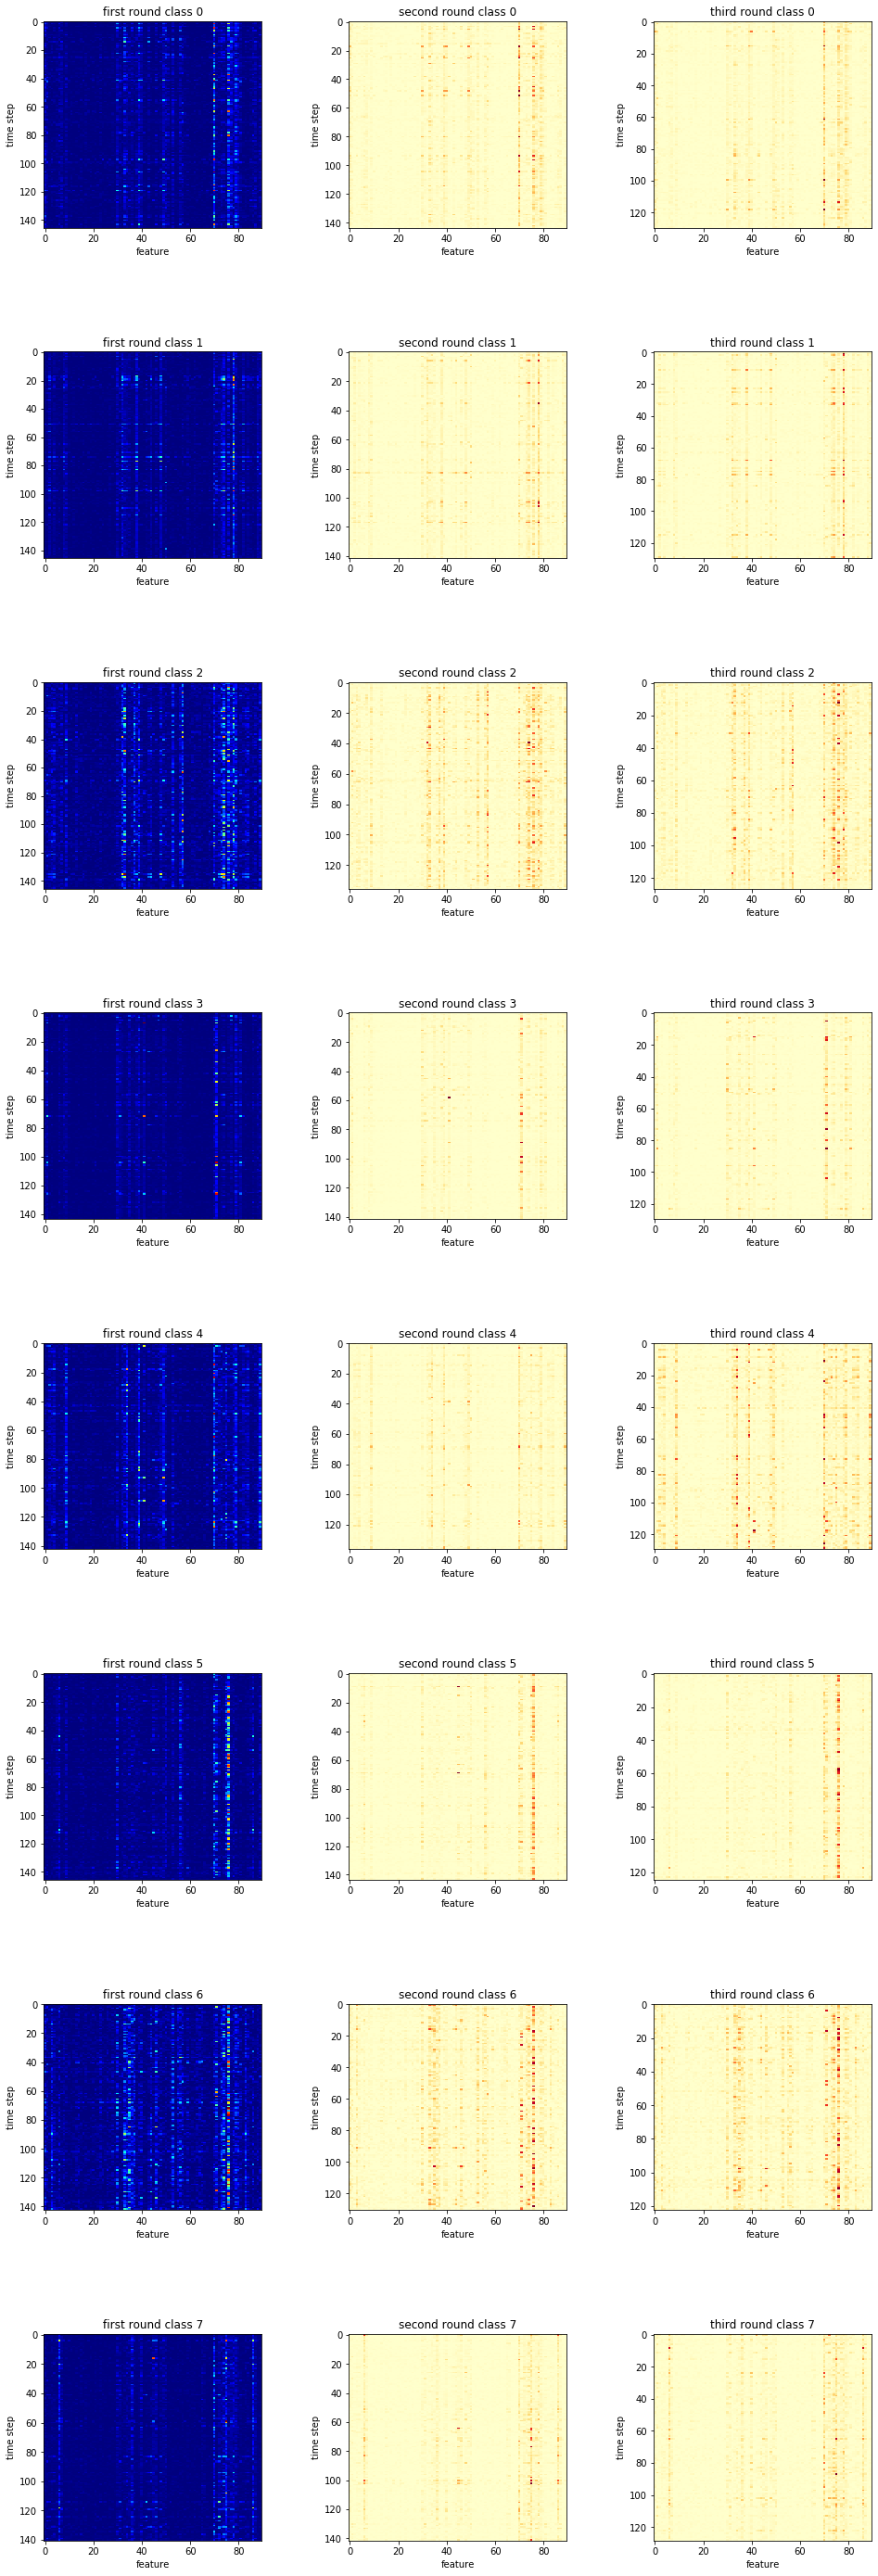

In [86]:
patient=0
heigth=8;
width=3;
f, axes = plt.subplots(heigth, width,figsize=(16, 50))
f.subplots_adjust(hspace=0.6, wspace=0.4)
for i in range(8):
    
    value=(shap_values_LDA_ordered[patient][i][indexes[patient][i]:indexes[patient][i+1]].abs())
    maximum=(value.max()).max()
    axes[i,0].imshow(value/maximum, cmap='jet', aspect='auto', alpha=1)
    axes[i,0].set(xlabel='feature', ylabel='time step')
    axes[i,0].set(title="first round class {}".format(i))
    
    value=(shap_values_LDA_ordered[patient][i][indexes[patient][i+8]:indexes[patient][i+8+1]].abs())
    maximum=(value.max()).max()
    axes[i,1].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
    axes[i,1].set(xlabel='feature', ylabel='time step')
    axes[i,1].set(title="second round class {}".format(i))
    
    value=(shap_values_LDA_ordered[patient][i][indexes[patient][i+16]:indexes[patient][i+16+1]].abs())
    maximum=(value.max()).max()
    axes[i,2].imshow(value/maximum, cmap='YlOrRd', aspect='auto', alpha=1)
    axes[i,2].set(xlabel='feature', ylabel='time step')
    axes[i,2].set(title="third round class {}".format(i))

In [88]:
shap_values_LDA_ordered[patient][i].columns

Index(['MAV1', 'MAV2', 'MAV3', 'MAV4', 'MAV5', 'MAV6', 'MAV7', 'MAV8', 'MAV9',
       'MAV10', 'ZC1', 'ZC2', 'ZC3', 'ZC4', 'ZC5', 'ZC6', 'ZC7', 'ZC8', 'ZC9',
       'ZC10', 'SSC1', 'SSC2', 'SSC3', 'SSC4', 'SSC5', 'SSC6', 'SSC7', 'SSC8',
       'SSC9', 'SSC10', 'WL1', 'WL2', 'WL3', 'WL4', 'WL5', 'WL6', 'WL7', 'WL8',
       'WL9', 'WL10', 'HP_A1', 'HP_A2', 'HP_A3', 'HP_A4', 'HP_A5', 'HP_A6',
       'HP_A7', 'HP_A8', 'HP_A9', 'HP_A10', 'HP_M1', 'HP_M2', 'HP_M3', 'HP_M4',
       'HP_M5', 'HP_M6', 'HP_M7', 'HP_M8', 'HP_M9', 'HP_M10', 'HP_C1', 'HP_C2',
       'HP_C3', 'HP_C4', 'HP_C5', 'HP_C6', 'HP_C7', 'HP_C8', 'HP_C9', 'HP_C10',
       'RMS1', 'RMS2', 'RMS3', 'RMS4', 'RMS5', 'RMS6', 'RMS7', 'RMS8', 'RMS9',
       'RMS10', 'IEMG1', 'IEMG2', 'IEMG3', 'IEMG4', 'IEMG5', 'IEMG6', 'IEMG7',
       'IEMG8', 'IEMG9', 'IEMG10'],
      dtype='object')